<a href="https://colab.research.google.com/github/SBhat2615/pcap-mini-project/blob/main/colab-workspace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# To show that if there is cuda tookit installed
!ls /usr/local

bin    cuda	cuda-11.8  games	       include	lib64	   man	 share
colab  cuda-11	etc	   _gcs_config_ops.so  lib	licensing  sbin  src


In [3]:
# To show that if we have the nvcc command
!which nvcc

/usr/local/cuda/bin/nvcc


In [4]:
# To show the property of the nvidia card(On my one, I use the K80)
!nvidia-smi

Thu Apr 27 13:24:53 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

#Download Image

In [24]:
!wget https://raw.githubusercontent.com/SBhat2615/pcap-mini-project/main/image.jpg

--2023-04-27 13:51:32--  https://raw.githubusercontent.com/SBhat2615/pcap-mini-project/main/image.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4305 (4.2K) [image/jpeg]
Saving to: ‘image.jpg’

image.jpg           100%[===================>]   4.20K  --.-KB/s    in 0s      

2023-04-27 13:51:33 (61.3 MB/s) - ‘image.jpg’ saved [4305/4305]



In [25]:
!ls -l

total 36
-rwxr-xr-x 1 root root 17016 Apr 27 13:46 a.out
-rw-r--r-- 1 root root  4305 Apr 27 13:51 image.jpg
-rw-r--r-- 1 root root  1123 Apr 27 13:46 loadImg.c
drwxr-xr-x 1 root root  4096 Apr 25 13:34 sample_data


In [32]:
!pwd

/content


**RUN THE BELOW 2 CELLS ONLY IF YOU HAVE RGB IMAGE UPLOADED**



# Image to GrayScale

In [8]:
from PIL import Image

# Open the image file
img = Image.open('/content/image.jpg')

# Convert to grayscale
gray_img = img.convert('L')

# Display the grayscale image
gray_img.show()

# Save the grayscale image
gray_img.save('/content/imageGray.jpg')

"\nfrom PIL import Image\n\n# Open the image file\nimg = Image.open('/content/image.jpg')\n\n# Convert to grayscale\ngray_img = img.convert('L')\n\n# Display the grayscale image\ngray_img.show()\n\n# Save the grayscale image\ngray_img.save('/content/imageGray.jpg')\n"

In [ ]:
!rm image.jpg
!mv imageGray.jpg image.jpg

# Display Image

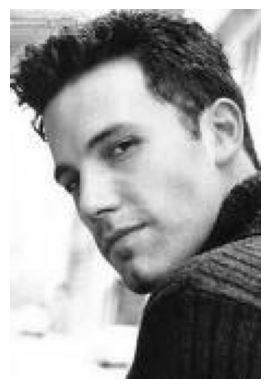

In [28]:
from matplotlib import pyplot as plt
import cv2

img = cv2.imread('./image.jpg')

plt.imshow(img)
plt.axis("off")
plt.show()

# Load Image

In [29]:
%%writefile loadImg.c
#include <stdio.h>
#include <stdlib.h>

// Define Image Height & Width
#define IMG_WIDTH 512
#define IMG_HEIGHT 512

int main() {
    FILE *fp;
    char *filename = "./image.jpg";
    unsigned char img[IMG_HEIGHT][IMG_WIDTH];
    int i, j;

    // Open image file
    if ((fp = fopen(filename, "rb")) == NULL) {
        printf("Error: Image file not found\n");
        return 1;
    }

    // Skip image header
    fseek(fp, 8, SEEK_SET);

    // Read image pixel values
    for (i = 0; i < IMG_HEIGHT; i++) {
        for (j = 0; j < IMG_WIDTH; j++) {
            img[i][j] = fgetc(fp);
        }
    }

    // Close image file
    fclose(fp);

    // Print image data
    /*
    for (i = 0; i < IMG_HEIGHT; i++) {
        for (j = 0; j < IMG_WIDTH; j++) {
            printf("%u ", img[i][j]);
        }
        printf("\n");
    }
    */
    printf("Image Width : %d\n", IMG_WIDTH);
    printf("Image Height : %d\n", IMG_HEIGHT);

    printf("Image Matrix:\n");
    for (i = 0; i < 25; i++) {
        for (j = 0; j < 25; j++) {
            printf("%u ", img[i][j]);
        }
        printf("\n");
    }

    return 0;
}


Overwriting loadImg.c


In [30]:
!gcc loadImg.c

In [31]:
!./a.out

Image Width : 512
Image Height : 512
Image Matrix:
73 70 0 1 1 0 0 1 0 1 0 0 255 254 0 59 67 82 69 65 84 79 82 58 32 
27 231 249 97 5 152 145 207 76 113 233 206 56 30 249 154 15 27 94 217 172 170 89 175 37 
242 156 130 185 61 126 96 1 193 247 246 237 214 164 107 137 96 150 67 4 184 40 188 133 127 
198 230 196 220 92 180 118 176 110 220 177 70 12 165 142 54 128 79 0 117 39 53 243 239 139 
207 140 34 129 133 165 148 23 45 59 112 139 26 3 215 220 255 0 64 126 181 221 120 51 80 
240 241 199 235 94 185 225 197 242 244 136 83 25 33 1 53 122 117 243 98 33 71 62 245 196 
19 171 178 204 153 224 16 121 174 159 64 188 210 116 54 92 182 226 223 121 206 9 99 238 107 
195 96 16 1 48 250 147 142 199 218 164 125 80 171 144 116 251 121 177 255 0 45 60 255 0 
140 47 74 127 221 149 58 125 220 210 200 119 108 25 206 122 243 154 116 140 190 95 7 105 45 
255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 
255 255 255 255 255 255 255 255 255 255 255 255 255 25

# Richardson-Lucy Algorithm

In [ ]:
%%writefile trial1.cu
#include <stdio.h>
#include <math.h>
#include <stdlib.h>
#define H 6
#define PIX 248
#define NUM 248 * 248
#define SIGMA 25
#ifndef max
#define max( a, b ) ( ((a) > (b)) ? (a) : (b) )
#endif
#ifndef min
#define min( a, b ) ( ((a) < (b)) ? (a) : (b) )
#endif
void dataread(float *y);
int distance(int i, int j, int k, int l);
void lambda(float *y, float *lold, float *lnew, float *p);
void renew(float *lold,float *lnew);
void spread(float *p);
void datasave(float *l);
int main(void){
int i;
float *y, *lold, *lnew, *p, ttt;
y = malloc(NUM * sizeof(float));
lold = malloc(NUM * sizeof(float));
lnew = malloc(NUM * sizeof(float));
p = malloc((2 * (H + 1) * (H + 1)) * sizeof(float));
spread(p);
dataread(y);
dataread(lold);
for(i = 0; i < 40; i++){
lambda(y, lold, lnew, p);
renew(lold, lnew);
printf("%d \n",i);
}
datasave(lnew);
free(p);
free(y);
free(lnew);
free(lold);
return 0;
}
/*READING THE DATA*/
void dataread(float *y){
int i;
FILE *fp;
fp = fopen("mylenna","r");
for(i = 0; i < NUM; i++){
fscanf(fp,"%f ",&y[i]);
}
return;
}
/*DEFINING A NORM*/
int distance(int i, int j, int k, int l){
int d;
d = (i - k) * (i - k) + (j - l) * (j - l);
return d;
}
/*LAMBDA VECTOR*/
void lambda(float *y, float *lold, float *lnew, float *p){
int i1, i2, j1, j2, k1, k2;
float temp, tmp;
for(i1 = 0; i1 < PIX; i1++){
for(i2 = 0; i2 < PIX; i2++){
tmp = 0;
for(j1 = max(0, i1 - H + 1); j1 < min(i1 + H - 1, PIX); j1++){
for(j2 = max(0, i2 - H + 1); j2 < min(i2 + H - 1, PIX); j2++){
temp = 0;
for(k1 = max(0, i1 - H + 1); k1 < min(i1 + H - 1, PIX); k1++){
for(k2 = max(0, i2 - H + 1); k2 < min(i2 + H - 1, PIX); k2++){
temp = temp + lold[k1 * PIX + k2] * p[distance(j1,j2,k1,k2)];
}
tmp = tmp + y[j1 * PIX + j2] * (p[distance(j1,j2,i1,i2)])/temp;
}
}
lnew[i1 * PIX + i2] = lold[i1 * PIX + i2] * tmp;
}
}
return;
}
/*Point Spread Function*/
void spread(float *p){
int i, j;
float temp = 0;
for(i = -H; i <= H; i++){
for(j = -H; j <= H; j++){
p[i * i + j * j] = exp(-((float)(i * i + j * j))/SIGMA);
temp += p[i * i + j * j];
}
}
for(i = -H; i <= H; i++)
for(j = -H; j <= H; j++)
p[i * i + j * j] = p[i * i + j * j]/temp;
return;
}
/*RENEW THE VALUE OF LAMBDA VECTOR*/
void renew(float *lold,float *lnew){
int i;
for(i = 0; i < NUM; i++)
lold[i] = lnew[i];
return;
}
/*SAVING THE DATA*/
void datasave(float *l){
int i, j;
FILE *fp;
fp = fopen("mylenn","w");
for(i = 0; i < PIX; i++){
for(j = 0; j < PIX; j++){
fprintf(fp,"%f ",l[i * PIX + j]);
}
fprintf(fp,"\n");
}
return;
}

Overwriting l9q1a.cu


In [ ]:
!nvcc -arch=sm_37 -gencode=arch=compute_37,code=sm_37 l9q1a.cu -o l9q1a

nvcc warning : The 'compute_35', 'compute_37', 'sm_35', and 'sm_37' architectures are deprecated, and may be removed in a future release (Use -Wno-deprecated-gpu-targets to suppress warning).


In [ ]:
!./l9q1a

Enter the value of m: 2
Enter the value of n: 2
Enter input matrix A:
2 4 5 6
Enter input matrix B:
7 8 3 2
cuda successfully ran!
cuda successfully ran!
Result matrix is:
9	12	
8	8	
